In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
import pandas as pd
df = pd.read_csv('food_coded.csv')
print(df.shape) 
print(df.head())  

(125, 61)
     GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.4       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2    3.3       1          1               720           4.0           420.0   
3    3.2       1          1               430           3.0           420.0   
4    3.5       1          1               720           2.0           420.0   

   coffee                      comfort_food        comfort_food_reasons  \
0       1                              none       we dont have comfort    
1       2       chocolate, chips, ice cream        Stress, bored, anger   
2       2   frozen yogurt, pizza, fast food             stress, sadness   
3       2  Pizza, Mac and cheese, ice cream                     Boredom   
4       2      Ice cream, chocolate, chips   Stress, boredom, cravings    

   comfort_food_reasons_coded  ...  soup  sports  thai_food tort

In [5]:
df.info()  
df.describe()  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [6]:
df.isna().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [7]:
df = df.drop(['type_sports', 'GPA', 'weight'], axis = 1)

In [8]:
df['calories_day'] = df['calories_day'].fillna(df['calories_day'].mean())


In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, RocCurveDisplay


In [10]:
df.columns
df.dtypes

Gender                            int64
breakfast                         int64
calories_chicken                  int64
calories_day                    float64
calories_scone                  float64
coffee                            int64
comfort_food                     object
comfort_food_reasons             object
comfort_food_reasons_coded      float64
cook                            float64
comfort_food_reasons_coded.1      int64
cuisine                         float64
diet_current                     object
diet_current_coded                int64
drink                           float64
eating_changes                   object
eating_changes_coded              int64
eating_changes_coded1             int64
eating_out                        int64
employment                      float64
ethnic_food                       int64
exercise                        float64
father_education                float64
father_profession                object
fav_cuisine                      object


In [17]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical predictors
categorical_cols = ['comfort_food', 'comfort_food_reasons', 'eating_changes']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Map Gender to 0/1 (0=female, 1=male)
df['Gender'] = df['Gender'].map({1: 0, 2: 1})

In [ ]:
X = df[['comfort_food','comfort_food_reasons','eating_changes']]  #predictors
Y = df['Gender']   #target variable

In [ ]:
#split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

#verify shapes
print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape, "Y_test shape:", Y_test.shape)

X_train shape: (100, 3) Y_train shape: (100,)
X_test shape: (25, 3) Y_test shape: (25,)


## 1. logistic regression
Train a logistic regression model to predict 'Gender' using three predictors.

 Logistic Regression is a linear classifier that models the probability of Gender being 1 (male) vs. 0 (female) using a logistic function. It’s interpretable and works well with encoded categoricals, though it assumes features are not highly collinear (we’ll assume these predictors are independent enough for now).

In [21]:
#Initialize and train
logistic_reg = LogisticRegression(max_iter=1000, multi_class='auto')
logistic_reg.fit(X_train, Y_train)

#Predict
pred_lr = logistic_reg.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, pred_lr))

Accuracy: 0.6


In [26]:
print(classification_report(Y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.50      0.10      0.17        10

    accuracy                           0.60        25
   macro avg       0.55      0.52      0.45        25
weighted avg       0.57      0.60      0.51        25



## Confusion matrix

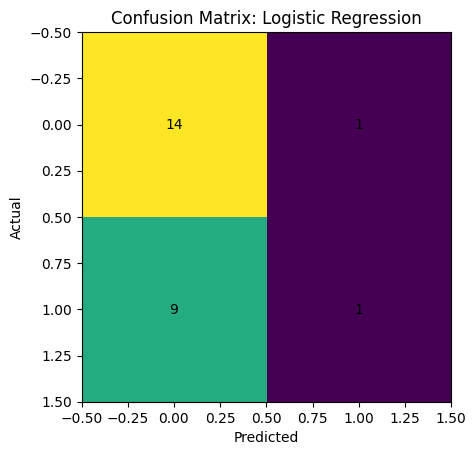

In [27]:
cm = confusion_matrix(Y_test, pred_lr)
plt.figure()
plt.imshow(cm)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

## 2. Decision Tree Classifier

Decision Tree is a non-linear classifier that splits data based on feature values, ideal for categorical features like ours. It’s interpretable but prone to overfitting, so we limit max_depth=5 to prevent overly complex trees.

In [ ]:
#Initialize and train
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, Y_train)

#predict
pred = tree.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, pred))

Accuracy: 0.56


In [29]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.40      0.20      0.27        10

    accuracy                           0.56        25
   macro avg       0.50      0.50      0.48        25
weighted avg       0.52      0.56      0.52        25



## confusion matrix

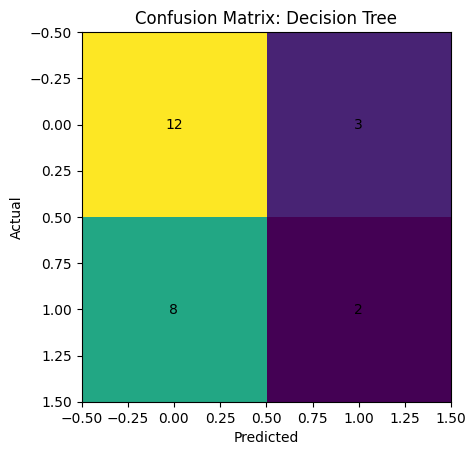

In [31]:
cm = confusion_matrix(Y_test, pred)
plt.figure()
plt.imshow(cm)
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

## Random Forest Classifier

Random Forest is an ensemble of decision trees, reducing overfitting by averaging multiple trees. It’s robust for categorical data and often performs better than a single tree.

In [32]:
#initialize and train
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, Y_train)
#predict
pred_rf = rf.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, pred_rf))

Accuracy: 0.52


In [33]:
print(classification_report(Y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        15
           1       0.25      0.10      0.14        10

    accuracy                           0.52        25
   macro avg       0.41      0.45      0.40        25
weighted avg       0.44      0.52      0.46        25



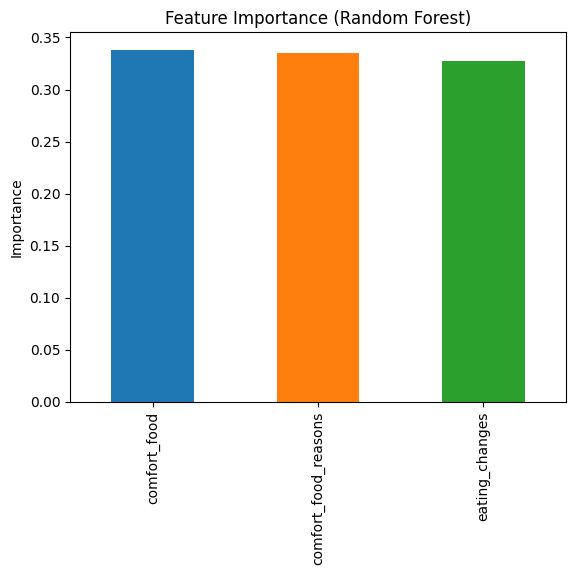

In [34]:


# Feature importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance')
plt.show()

Since the model performance accuracy is less than 70%, the predictors may not strongly correlate with Gender. 

So we consider:

- Adding more features like fav_cuisine_coded, eating_out from the dataset.
- Trying a different target like comfort_food_reasons_coded (multi-class).